#Road Network Analysis

Install packages

In [1]:
!pip install osmnx
!pip install matplotlib==3.1.3

     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 62 kB 575 kB/s 
     |████████████████████████████████| 10.3 MB 26.3 MB/s 
     |████████████████████████████████| 1.0 MB 60.8 MB/s 
     |████████████████████████████████| 6.3 MB 21.5 MB/s 
     |████████████████████████████████| 994 kB 68.6 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompat

     |████████████████████████████████| 13.1 MB 101 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import osmnx as ox
from IPython.display import Image
import networkx
import matplotlib.pyplot as plt
import numpy as np
import folium
%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.1'

Use osmnx to obtain and plot a network representation of Paysandú's road network 

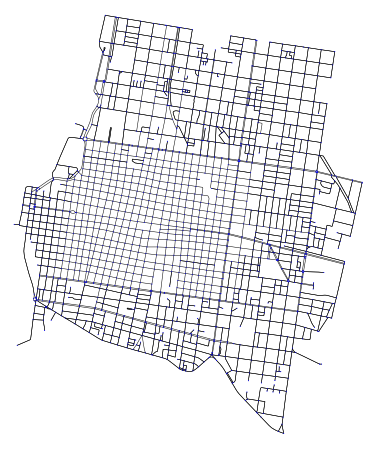

In [3]:
# No need to change this code
G = ox.graph_from_place('Paysandu, Uruguay', simplify=True, network_type='drive')
fig, ax = ox.plot_graph(G, bgcolor="white", node_color="blue",  node_size=1, edge_color="black", edge_linewidth=0.5, dpi=1000)

NodeView((331863422, 331863616, 331864404, 331876987, 331881044, 331881310, 331935842, 331935845, 331937525, 331938126, 331938128, 331939749, 331941303, 331941305, 331942884, 331942962, 331942963, 331943206, 331943207, 331943286, 332101515, 332103349, 332103350, 332103356, 332105414, 332105483, 332105485, 332106063, 332106064, 332106067, 332106547, 332106566, 332106594, 332106639, 332283084, 332283085, 332283447, 332299940, 332978429, 332978430, 332978718, 332979013, 332979015, 335694955, 335850736, 335850753, 335850881, 335851689, 335852158, 335852160, 335895186, 335895187, 793836760, 793836768, 793836770, 793836771, 793836772, 793836773, 793836774, 793836779, 793836781, 846497061, 846497063, 846497064, 846497065, 846497066, 846497067, 846497068, 846497069, 846497070, 846497071, 846497072, 846497073, 846497074, 846497075, 846497076, 846497077, 846497078, 846497079, 846497080, 846497081, 846497082, 846497083, 846497084, 846497085, 846497086, 860700017, 860700018, 860700020, 860700021, 

Visualize the network

Visualize the network as a "folium" (aka on top of a scrollable map)

In [4]:
# No need to change this code 
ox.plot_graph_folium(G, graph_map=None, popup_attribute=None, 
                      tiles='cartodbpositron', zoom=1, fit_bounds=True, 
                      edge_width=1, edge_opacity=1)

Output hidden; open in https://colab.research.google.com to view.

## Describe network:

Plot the degree distribution and highlight the nodes in the largest connected component. 

### Degree Distribution:
See code [here](https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html)

<BarContainer object of 8 artists>

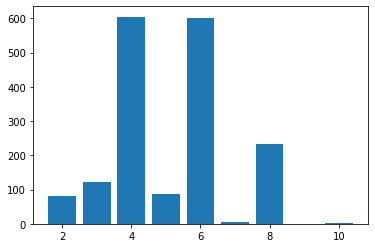

In [10]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
import matplotlib.pyplot as plt
plt.bar(*np.unique(degree_sequence, return_counts=True))

In [7]:
G.degree()

DiMultiDegreeView({331863422: 4, 331863616: 4, 331864404: 5, 331876987: 4, 331881044: 5, 331881310: 5, 331935842: 4, 331935845: 5, 331937525: 6, 331938126: 6, 331938128: 8, 331939749: 8, 331941303: 4, 331941305: 4, 331942884: 4, 331942962: 8, 331942963: 6, 331943206: 8, 331943207: 8, 331943286: 8, 332101515: 8, 332103349: 3, 332103350: 4, 332103356: 6, 332105414: 4, 332105483: 4, 332105485: 4, 332106063: 4, 332106064: 3, 332106067: 3, 332106547: 4, 332106566: 5, 332106594: 5, 332106639: 5, 332283084: 4, 332283085: 4, 332283447: 4, 332299940: 4, 332978429: 8, 332978430: 4, 332978718: 4, 332979013: 4, 332979015: 4, 335694955: 6, 335850736: 8, 335850753: 6, 335850881: 4, 335851689: 8, 335852158: 4, 335852160: 6, 335895186: 6, 335895187: 6, 793836760: 4, 793836768: 4, 793836770: 6, 793836771: 6, 793836772: 8, 793836773: 6, 793836774: 8, 793836779: 8, 793836781: 5, 846497061: 6, 846497063: 6, 846497064: 8, 846497065: 6, 846497066: 4, 846497067: 4, 846497068: 8, 846497069: 8, 846497070: 4, 8

Calculate statistics on the network such as betweeness centrality, eigenvalue centrality, closeness centrality etc

In [11]:
# No need to change the code in this block
extended_stats = ox.extended_stats(G, bc=True, cc=True)
print(extended_stats.keys())

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:405: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


dict_keys(['avg_neighbor_degree', 'avg_neighbor_degree_avg', 'avg_weighted_neighbor_degree', 'avg_weighted_neighbor_degree_avg', 'degree_centrality', 'degree_centrality_avg', 'clustering_coefficient', 'clustering_coefficient_avg', 'clustering_coefficient_weighted', 'clustering_coefficient_weighted_avg', 'pagerank', 'pagerank_max_node', 'pagerank_max', 'pagerank_min_node', 'pagerank_min', 'closeness_centrality', 'closeness_centrality_avg', 'betweenness_centrality', 'betweenness_centrality_avg'])


In [13]:
extended_stats['clustering_coefficient_avg']

0.020617568085922505

Visualize **Clustering Coefficient**

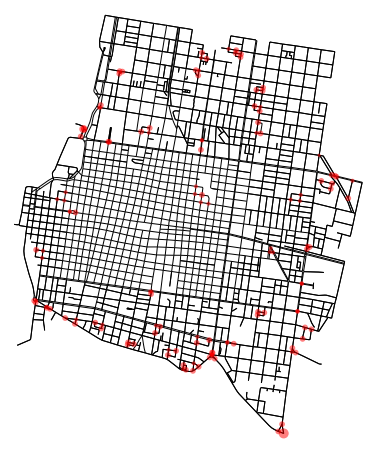

In [14]:
# no need to change this block 
per_node_values=[extended_stats['clustering_coefficient'][node] for node in G.nodes()]
per_node_values = (np.asarray(per_node_values)- min(per_node_values)) / (max(per_node_values) - min(per_node_values))
ns = 100*per_node_values
fig, ax = ox.plot_graph(G, node_size=ns, node_color='r', node_alpha=0.5, bgcolor="w",  edge_color="black")

Visualize **Degree Centrality**


In [ ]:
ns = <ADD CODE TO FIND NODE SIZE CORRESPONDING TO DEGREE CENTRALITY>
fig, ax = ox.plot_graph(G, node_size=ns, node_color='r', node_alpha=0.5, bgcolor="w",  edge_color="black")

Visualize **Closeness Centrality**

In [ ]:
ns = <ADD CODE TO FIND NODE SIZE CORRESPONDING TO CLOSENESS CENTRALITY>
fig, ax = ox.plot_graph(G, node_size=ns, node_color='r', node_alpha=0.1, bgcolor="w",  edge_color="black")

Visualize **Eigenvector Centrality**

In [ ]:
ns = <ADD CODE TO FIND NODE SIZE CORRESPONDING TO EIGENVECTOR CENTRALITY>
fig, ax = ox.plot_graph(G, node_size=ns, node_color='r', node_alpha=0.1, bgcolor="w",  edge_color="black")